In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')
df.drop(['Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
       'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
       'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band', 'Tenure Band', 
       'Performance Review Year', 'Potential Rating', 'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
       'Projects Handled Band', 'Project Target Band', 'Working Hours',
       'Overtime'], axis=1, inplace=True)
# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     1800 non-null   object
 1   Education Level            1800 non-null   object
 2   Department                 1800 non-null   object
 3   Job Title                  1800 non-null   object
 4   Organization Level         1800 non-null   object
 5   Region                     1800 non-null   object
 6   Country                    1800 non-null   object
 7   Employment Status          1800 non-null   object
 8   Employment Type            1800 non-null   object
 9   Times Promoted             1800 non-null   int64 
 10  Current Employment Status  1800 non-null   object
 11  Ethnicity                  1800 non-null   object
 12  Tenure (Years)             1800 non-null   int64 
 13  Age (Years)                1800 non-null   int64 
 14  Salary B

In [17]:

# Encode categorical variables
for col in ['Gender', 'Education Level', 'Department', 'Job Title', 'Organization Level',
            'Region', 'Country', 'Employment Status', 'Employment Type',
            'Current Employment Status', 'Ethnicity', 'Salary Band',
            'Incentive Amount ($) Band', 'Bonus ($) Band', 'Working Hours Band', 
            'Overtime Band']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing Function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.1, shuffle=True, random_state=1
    )
    
    # Standardize only numerical columns (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Initialize GradientBoostingClassifier with hyperparameters
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=1
)

# Train the model
gbc.fit(X_train, y_train)

# Predict labels and probabilities for the test set only
y_predict = gbc.predict(X_test)
y_prob = gbc.predict_proba(X_test)[:, 1]

# Evaluate model performance on the test set
print("Accuracy:", accuracy_score(y_test, y_predict))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_predict))

# Add Predict and Probability columns to a copy of the test DataFrame for analysis (optional)
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predict'] = y_predict
test_results['Probability'] = y_prob

# Display updated test results DataFrame (optional)
print(test_results.head())
test_results

Accuracy: 0.9302469135802469
AUC-ROC: 0.9084056578275623
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1407
           1       0.80      0.62      0.70       213

    accuracy                           0.93      1620
   macro avg       0.87      0.80      0.83      1620
weighted avg       0.93      0.93      0.93      1620

      Gender  Education Level  Department  Job Title  Organization Level  \
1462       0                4           6         14                   0   
510        1                3           5         11                   1   
612        0                3           5         12                   1   
1322       0                2           4          8                   1   
993        1                4           2         15                   2   

      Region  Country  Employment Status  Employment Type  Times Promoted  \
1462       1        1                  1                1 

,Gender,Education Level,Department,Job Title,Organization Level,Region,Country,Employment Status,Employment Type,Times Promoted,Ethnicity,Tenure (Years),Age (Years),Salary Band,Performance Rating,Projects Handled,Project Target,Team Size,Satisfaction Score,Incentive Amount ($) Band,Bonus ($) Band,Working Hours Band,Overtime Band,Actual,Predict,Probability
1462,0,4,6,14,0,1,1,1,1,0.096337,7,-1.028122,-1.580556,4,3,-1.483736,-1.316483,11,5,2,2,2,4,0,0,0.013416
510,1,3,5,11,1,1,3,1,0,-1.348713,1,-1.028122,0.844161,4,2,-1.417068,-1.430739,4,3,2,2,3,3,0,0,0.007255
612,0,3,5,12,1,2,4,0,0,-0.626188,9,-0.376495,0.991113,4,3,-0.617050,-0.745203,10,4,3,3,3,1,0,0,0.000540
1322,0,2,4,8,1,2,4,1,0,0.818861,15,-2.331375,0.403303,0,3,2.316347,2.625350,15,3,1,0,3,1,1,1,0.994031
993,1,4,2,15,2,0,0,0,1,0.818861,3,1.578385,-0.698841,0,3,1.382993,1.197149,7,5,3,0,3,2,0,0,0.000510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0,0,0,4,2,2,4,1,0,0.818861,15,0.926758,-0.037555,3,3,0.916316,0.911509,8,4,0,0,3,1,0,0,0.000473
1236,0,0,4,10,0,1,3,0,0,0.096337,16,-1.028122,0.403303,3,3,2.183010,2.339710,13,4,4,0,4,1,1,0,0.462199
1764,1,0,3,9,0,1,1,1,0,-0.626188,7,1.578385,-0.037555,3,2,1.516329,1.197149,10,4,3,3,4,1,0,0,0.000175
910,1,1,2,15,2,0,2,0,0,-0.626188,11,0.926758,-1.139699,3,2,0.649644,0.511613,11,4,3,3,3,3,0,0,0.000501


In [18]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Map weights to the target classes
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize GradientBoostingClassifier with class weights
gbc_weighted = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=1
)

# Train the weighted model
gbc_weighted.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_predict_weighted = gbc_weighted.predict(X_test)
y_prob_weighted = gbc_weighted.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Accuracy (Weighted):", accuracy_score(y_test, y_predict_weighted))
print("AUC-ROC (Weighted):", roc_auc_score(y_test, y_prob_weighted))
print("Classification Report (Weighted):\n", classification_report(y_test, y_predict_weighted))


Accuracy (Weighted): 0.9364197530864198
AUC-ROC (Weighted): 0.9069174583153983
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1407
           1       0.82      0.66      0.73       213

    accuracy                           0.94      1620
   macro avg       0.89      0.82      0.85      1620
weighted avg       0.93      0.94      0.93      1620



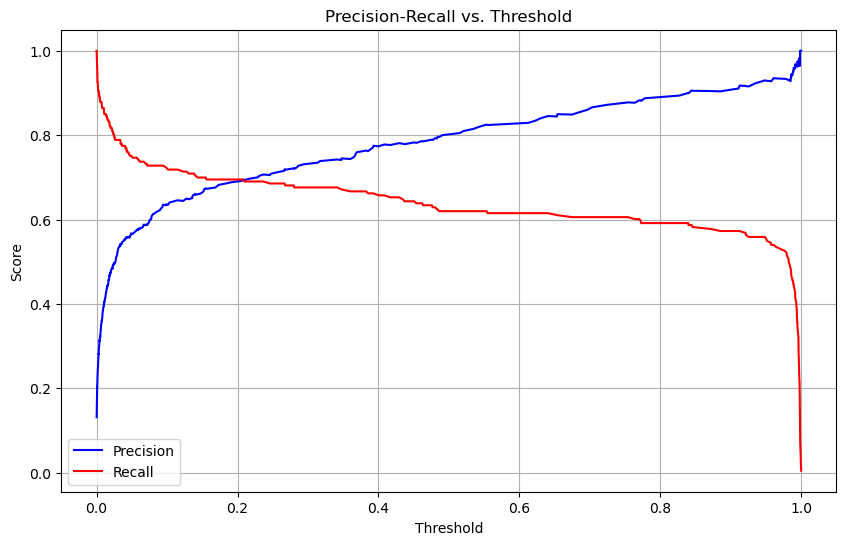

In [19]:
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve

# Get prediction probabilities
y_prob = gbc.predict_proba(X_test)[:, 1]

# Analyze precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()


In [20]:
import joblib

# Save the trained model
joblib.dump(gbc_weighted, 'employee_resignation_model.pkl')

# Save feature names from X_train
feature_names = X_train.columns.tolist()

# Save feature names to a file for future use
import joblib
joblib.dump(feature_names, 'feature_names.pkl')

# Save feature names from X_train
feature_names = X_train.columns.tolist()

# Save feature names to a file for future use
import joblib
joblib.dump(feature_names, 'feature_names.pkl')

['feature_names.pkl']

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import joblib

# Load and preprocess the dataset
df = pd.read_csv('D:\\high performance project\\project\\dataset final\\final_data.csv')

# Drop unnecessary columns
df.drop(
    [
        'Employee ID', 'Full Name', 'Date of Birth', 'Hire Date',
        'Latitude', 'Longitude', 'Incentive Amount ($)', 'Bonus ($)',
        'Base Salary ($)', 'Annual Leave Entitlement (days)', 'Age Band',
        'Tenure Band', 'Performance Review Year', 'Potential Rating',
        'Satisfaction Score Band', 'Team Size Band', 'Performance Rating Band',
        'Projects Handled Band', 'Project Target Band', 'Working Hours',
        'Overtime'
    ],
    axis=1,
    inplace=True
)

# List of columns to round up
columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']

# Apply rounding up (ceil) and convert to integers
df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

# Encode categorical variables using LabelEncoder
categorical_columns = [
    'Gender', 'Education Level', 'Department', 'Job Title',
    'Organization Level', 'Region', 'Country', 'Employment Status',
    'Employment Type', 'Current Employment Status', 'Ethnicity',
    'Salary Band', 'Incentive Amount ($) Band', 'Bonus ($) Band',
    'Working Hours Band', 'Overtime Band'
]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Preprocessing function
def preprocess_inputs(df):
    df = df.copy()
    
    # Separate features and target
    y = df['Current Employment Status']
    X = df.drop('Current Employment Status', axis=1)
    
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.1, shuffle=True, random_state=1
    )
    
    # Standardize only numerical columns (if applicable)
    scaler = StandardScaler()
    num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns
    scaler.fit(X_train[num_cols])
    
    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    return X_train, X_test, y_train, y_test

# Preprocess inputs
X_train, X_test, y_train, y_test = preprocess_inputs(df)

# Calculate class weights for imbalance handling
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize GradientBoostingClassifier with class weights and hyperparameters
gbc_weighted = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=1
)

# Train the weighted model
gbc_weighted.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_predict_weighted = gbc_weighted.predict(X_test)
y_prob_weighted = gbc_weighted.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
print("Accuracy (Weighted):", accuracy_score(y_test, y_predict_weighted))
print("AUC-ROC (Weighted):", roc_auc_score(y_test, y_prob_weighted))
print("Classification Report (Weighted):\n", classification_report(y_test, y_predict_weighted))

# Save the trained model to a file for future use
joblib.dump(gbc_weighted, 'employee_resignation_model.pkl')

# Save feature names from X_train for alignment during prediction
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

Accuracy (Weighted): 0.9364197530864198
AUC-ROC (Weighted): 0.9069174583153983
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1407
           1       0.82      0.66      0.73       213

    accuracy                           0.94      1620
   macro avg       0.89      0.82      0.85      1620
weighted avg       0.93      0.94      0.93      1620



['feature_names.pkl']

In [22]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the trained model and feature names
model = joblib.load('employee_resignation_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# Define preprocessing function
def preprocess_new_data(df):
    # List of columns to round up
    columns_to_round = ['Team Size', 'Satisfaction Score', 'Performance Rating']
    df[columns_to_round] = df[columns_to_round].apply(np.ceil).astype(int)

    # Encode categorical variables
    categorical_columns = [
        'Gender', 'Education Level', 'Department', 'Job Title',
        'Organization Level', 'Region', 'Country', 'Employment Status',
        'Employment Type', 'Ethnicity', 'Salary Band',
        'Incentive Amount ($) Band', 'Bonus ($) Band',
        'Working Hours Band', 'Overtime Band'
    ]
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Standardize numerical columns
    scaler = StandardScaler()
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = scaler.fit_transform(df[num_cols])
    
    return df

# Load new employee data (replace with your dataset)
new_data = pd.read_csv('work.csv')

# Preprocess new data
processed_data = preprocess_new_data(new_data)

# Align columns to match training data
processed_data = processed_data[feature_names]

# Predict resignation probabilities and labels
probabilities = model.predict_proba(processed_data)[:, 1]
predictions = model.predict(processed_data)

# Add predictions to the dataset
new_data['Resignation Probability'] = probabilities
new_data['Resignation Prediction'] = predictions

# Save the results to a CSV file for Power BI
new_data.to_csv('99999 predicted_resignations.csv', index=False)

In [23]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_predict_weighted, output_dict=True)

# Extract F1-scores for each class
f1_scores = {
    "Class": ["Not Resigned (0)", "Resigned (1)"],
    "F1-Score": [report["0"]["f1-score"], report["1"]["f1-score"]]
}

# Convert to DataFrame
f1_df = pd.DataFrame(f1_scores)

# Save the F1-scores to a CSV file for Power BI import
f1_df.to_csv('f1_scores.csv', index=False)

print(f1_df)


              Class  F1-Score
0  Not Resigned (0)  0.963923
1      Resigned (1)  0.732468
